## A "Thin" Application of Time Series

[Google Trends](https://trends.google.com/trends/) allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called diet. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [pandas basics Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/fbc502d0-46b2-4e1b-b6b0-5402ff273251) and keep it handy!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
diet = pd.read_csv('diet.csv', index_col=0)
diet.head()

,diet
Date,
6/26/2011,70
7/3/2011,71
7/10/2011,73
7/17/2011,74
7/24/2011,72


Convert the date index to datetime using pandas's to_datetime().

In [3]:
# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)
diet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2011-06-26 to 2016-06-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   diet    261 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


Plot the time series and set the argument grid to True to better see the year-ends

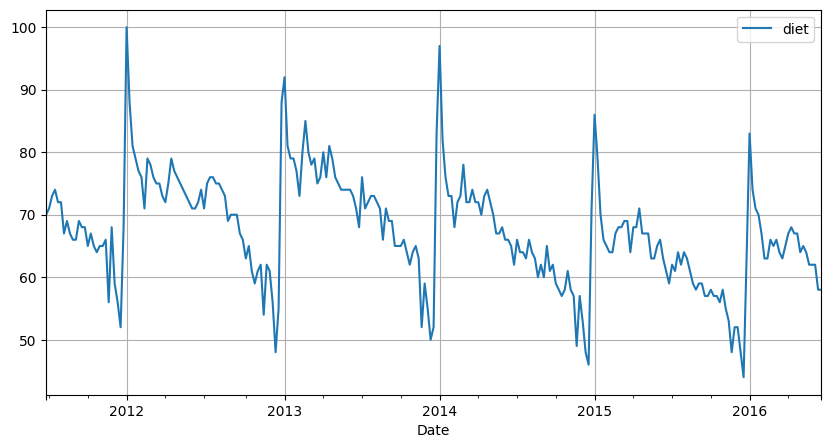

In [4]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

* Slice the `diet` dataset to keep only values from 2012, assigning to `diet2012`.
* Plot the `diet2012`, again creating gridlines with the `grid` argument.

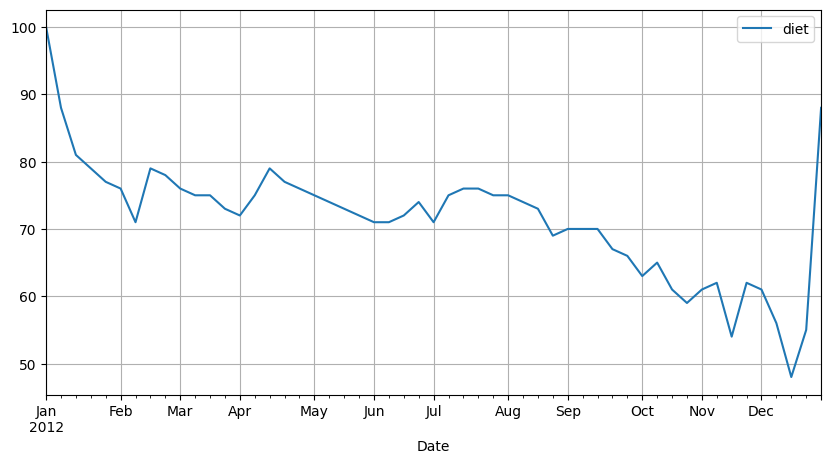

In [5]:
# Slice the dataset to keep only 2012
diet2012 = diet[diet.index.year==2012]

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

## Merging Time Series With Different Dates

Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas `.join()` method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from [FRED](https://fred.stlouisfed.org/), are pre-loaded in DataFrames `stocks` and `bonds`.

* Convert the dates in the stocks.index and bonds.index into sets.
* Take the difference of the stock set minus the bond set to get those dates where the stock market has data but the bond market does not.
* Merge the two DataFrames into a new DataFrame, stocks_and_bonds using the .join() method, which has the syntax df1.join(df2).
* To get the intersection of dates, use the argument how='inner'.

In [8]:
stocks = pd.read_csv('stocks.csv', index_col=0)
bonds = pd.read_csv('bonds.csv', index_col=0)

In [9]:
stocks.index = pd.to_datetime(stocks.index)
bonds.index = pd.to_datetime(bonds.index)

In [10]:
stocks.head()

,SP500
observation_date,
2007-06-11,1509.12
2007-06-12,1493.00
2007-06-13,1515.67
2007-06-14,1522.97
2007-06-15,1532.91


In [14]:
bonds.head()

,US10Y
observation_date,
2007-06-08,5.12
2007-06-11,5.14
2007-06-12,5.26
2007-06-13,5.20
2007-06-14,5.23


In [11]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

In [12]:
set_stock_dates

{Timestamp('2011-07-19 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2009-03-25 00:00:00'),
 Timestamp('2017-03-08 00:00:00'),
 Timestamp('2009-04-24 00:00:00'),
 Timestamp('2011-11-28 00:00:00'),
 Timestamp('2016-02-26 00:00:00'),
 Timestamp('2012-03-23 00:00:00'),
 Timestamp('2007-07-17 00:00:00'),
 Timestamp('2009-03-31 00:00:00'),
 Timestamp('2014-11-14 00:00:00'),
 Timestamp('2011-09-07 00:00:00'),
 Timestamp('2013-06-03 00:00:00'),
 Timestamp('2011-11-07 00:00:00'),
 Timestamp('2014-02-04 00:00:00'),
 Timestamp('2010-07-09 00:00:00'),
 Timestamp('2015-11-27 00:00:00'),
 Timestamp('2016-05-18 00:00:00'),
 Timestamp('2007-07-13 00:00:00'),
 Timestamp('2009-05-13 00:00:00'),
 Timestamp('2012-04-23 00:00:00'),
 Timestamp('2013-06-06 00:00:00'),
 Timestamp('2013-09-10 00:00:00'),
 Timestamp('2011-09-13 00:00:00'),
 Timestamp('2014-08-06 00:00:00'),
 Timestamp('2007-11-14 00:00:00'),
 Timestamp('2012-11-06 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2008-03-

In [13]:
# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrame using join()
stocks_and_bonds = stocks.join(bonds, how='inner')

{Timestamp('2013-10-14 00:00:00'), Timestamp('2010-10-11 00:00:00'), Timestamp('2014-10-13 00:00:00'), Timestamp('2009-11-11 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2017-06-09 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2008-11-11 00:00:00'), Timestamp('2010-11-11 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2007-11-12 00:00:00'), Timestamp('2011-10-10 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2014-11-11 00:00:00'), Timestamp('2009-10-12 00:00:00'), Timestamp('2011-11-11 00:00:00'), Timestamp('2007-10-08 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2013-11-11 00:00:00'), Timestamp('2016-10-10 00:00:00')}


In [15]:
stocks_and_bonds.head()

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


## Correlation of Stocks and Bonds

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Stock prices and 10-year bond yields are combined in a DataFrame called `stocks_and_bonds` under columns `SP500` and `US10Y`

The `pandas` and plotting modules have already been imported for you. For the remainder of the course, `pandas` is imported as `pd` and `matplotlib.pyplot` is imported as `plt`.

* Compute percent changes on the `stocks_and_bonds` DataFrame using the `.pct_change()` method and call the new DataFrame `returns`.
* Compute the correlation of the columns `SP500` and `US10Y` in the `returns` DataFrame using the `.corr()` method for Series which has the syntax `series1.corr(series2)`.
* Show a scatter plot of the percentage change in stock and bond yields.

$pct\_change=\frac {(x_t-x_{t-1})}{x_{t-1}}$

In [16]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()
returns.head()

,SP500,US10Y
observation_date,,
2007-06-11,NaN,NaN
2007-06-12,-0.010682,0.023346
2007-06-13,0.015184,-0.011407
2007-06-14,0.004816,0.005769
2007-06-15,0.006527,-0.013384


In [17]:
# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:  0.4119448886249272


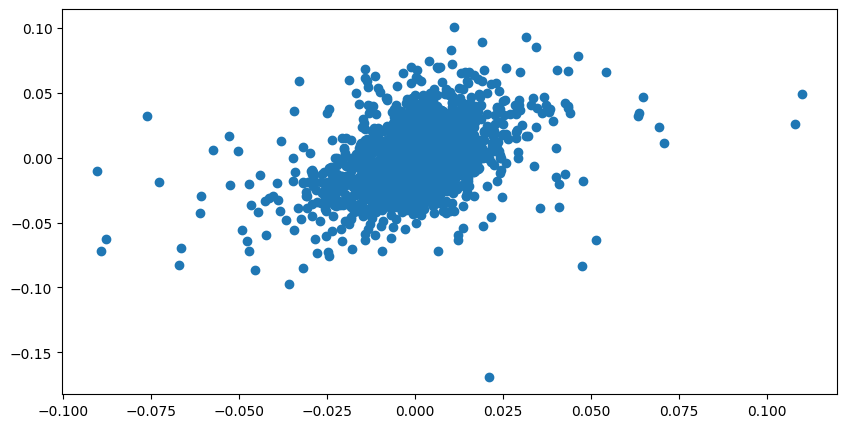

In [18]:
# Make scatter plot
plt.scatter(returns['SP500'],returns['US10Y'])

## Flying Saucers Aren't Correlated to Flying Markets

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their *returns* and not their *levels*.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

The DataFrame `levels` contains the levels of `DJI` and `UFO`. UFO data was downloaded from [www.nuforc.org](http://www.nuforc.org/).

* Preprocess

In [20]:
DJI = pd.read_csv('Finance/DJI.csv', index_col=0)
DJI.columns = ['DJI']
DJI.head()

,DJI
Date,
1941,110.96
1942,119.40
1943,135.89
1944,152.32
1945,192.91


In [22]:
UFO = pd.read_csv('UFO.csv', index_col=0)
UFO.columns = ['UFO']
UFO.head()

,UFO
Date,
1941,1
1942,2
1943,9
1944,9
1945,9


* Calculate the correlation of the columns `DJI` and `UFO`.
* Create a new DataFrame of changes using the `.pct_change()` method.
* Re-calculate the correlation of the columns `DJI` and `UFO` on the changes.

In [34]:
levels=UFO.join(DJI,how='inner' ).head()
levels.head()

,UFO,DJI
Date,,
1941,1,110.96
1942,2,119.40
1943,9,135.89
1944,9,152.32
1945,9,192.91


Text(0, 0.5, 'Dow Jones Average/Number of Sightings')

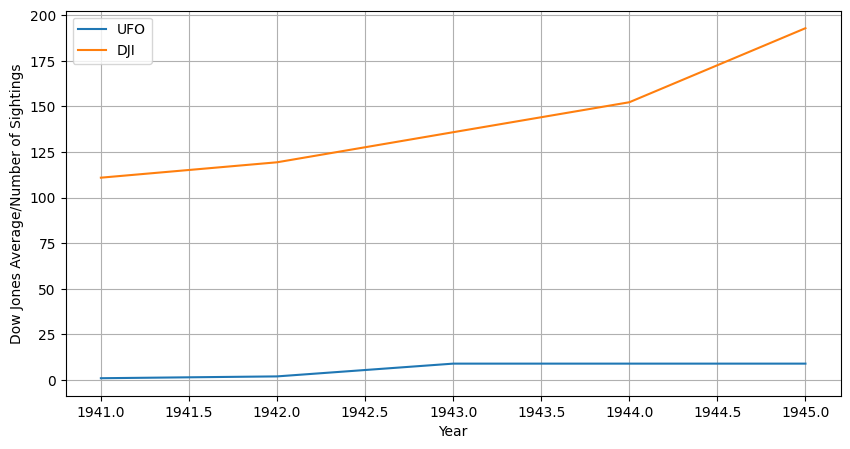

In [35]:
levels.plot(grid=True);
plt.xlabel('Year');
plt.ylabel('Dow Jones Average/Number of Sightings')

In [36]:
# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

Correlation of levels:  0.7681244462520034


In [37]:
DJI['DJI'].corr(UFO['UFO'])

0.939976221072643

In [27]:
DJI.join(UFO,how='inner' ).pct_change().head()

,DJI,UFO
Date,,
1941,NaN,NaN
1942,0.076063,1.0
1943,0.138107,3.5
1944,0.120907,0.0
1945,0.266478,0.0


In [28]:
# Compute correlation of percent changes
changes = DJI.join(UFO,how='inner' ).pct_change()
changes.head()

,DJI,UFO
Date,,
1941,NaN,NaN
1942,0.076063,1.0
1943,0.138107,3.5
1944,0.120907,0.0
1945,0.266478,0.0


In [29]:
correlation2=changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of changes:  0.06026935462405373


## Simple Linear Regression

A linear Regression is also an ordinary least squares

* What is a Regression?
  * simeple linear regression: $ y_t = \alpha + \beta x_t + \epsilon_t$
* Relationship between R-Squared and Correlation
  * $[corr(x,y)]^2 =R^2$
  * sign(corr) = sign(regression slope)

## Looking at a Regression's R-Squared

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package `statsmodels`, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, `x` and `y`, compute their correlation, and then regress `y` on `x` using the function `OLS(y,x)` in the `statsmodels.api` library (note that the dependent, or right-hand side variable `y` is the first argument). Most linear regressions contain a constant term which is the intercept (the $\alpha$
 in the regression $y_t =\alpha + \Beta x_t + \epsilon_t$
). To include a constant using the function `OLS()`, you need to add a column of 1's to the right hand side of the regression.

The module `statsmodels.api` has been imported for you as `sm`.

* Preprocess

In [38]:
df_x = pd.read_csv('x.csv', index_col=0, header=None)
df_y = pd.read_csv('y.csv', index_col=0, header=None)

df_x.columns = ['x']
df_y.columns = ['y']

x = df_x.reset_index(drop=True)['x']
y = df_y.reset_index(drop=True)['y']

In [39]:
x.head()

0    1.281155
1   -0.612631
2    0.933222
3    2.269327
4   -1.427691
Name: x, dtype: float64

* Compute the correlation between `x` and `y` using the `.corr()` method.
* Run a regression:
    * First convert the Series `x` to a DataFrame `dfx`.
    * Add a constant using `sm.add_constant()`, assigning it to `dfx1`
    * Regress `y` on `dfx1` using `sm.OLS().fit()`.
* Print out the results of the regression and compare the R-squared with the correlation.

In [40]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

The correlation between x and y is -0.90


In [41]:
# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])
dfx.head()

,x
0,1.281155
1,-0.612631
2,0.933222
3,2.269327
4,-1.427691


In [42]:

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)
dfx1.head()

,const,x
0,1.0,1.281155
1,1.0,-0.612631
2,1.0,0.933222
3,1.0,2.269327
4,1.0,-1.427691


In [46]:
# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

In [47]:
# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:44:09   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.013     -0.391      0.6

## Autocorrelation

* Correlation of a time series with a lagged copy of itself
* Lag-one autocorrelation
* Also called **serial correlation**

Autocorrelation is the correlation of a single time series with a lagged copy of itself. It's also called "serial correlation". Often, when we refer to a series's autocorrelation, we mean the "lag-one" autocorrelation. So when using daily data, for example, the autocorrelation would be the correlation of the series with the same series lagged by one day.

What does it mean when a series has a positive or negative autocorrelation? With financial time series, when returns have a negative autocorrelation, we say it is "mean reverting".

Alternatively, if a series has positive autocorrelation, we say it is "trend-following".


## A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see [here](https://web.mit.edu/Alo/www/Papers/august07.pdf).

You'll look at the autocorrelation of weekly returns of `MSFT` stock from 2012 to 2017. You'll start with a DataFrame MSFT of daily prices. You should use the `.resample()` method to get weekly prices and then compute returns from prices. Use the pandas method `.autocorr()` to get the autocorrelation and show that the autocorrelation is negative. Note that the `.autocorr()` method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

* Preprocess

In [50]:
MSFT = pd.read_csv('Finance/MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index, format="%m/%d/%Y")
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


* Use the `.resample()` method with `rule='W'` followed by the function `.last()` to convert daily data to weekly data.
* Create a new DataFrame, returns, of percent changes in weekly prices using the `.pct_change()` method.
* Compute the autocorrelation using the `.autocorr()` method on the series of closing stock prices, which is the column `'Adj Close'` in the DataFrame `returns`.

In [52]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()
MSFT.head()

,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091


In [53]:
# Compute the percentage change of prices
returns = MSFT.pct_change()
returns.head()

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218


In [54]:
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


## Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame `daily_rates` contains daily data of 10-year interest rates from 1962 to 2017.

* Preprocess

In [55]:
daily_rates = pd.read_csv('daily_rates.csv', index_col=0, parse_dates=['DATE'])
daily_rates.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


* Create a new DataFrame, `daily_diff`, of changes in daily rates using the `.diff()` method.
* Compute the autocorrelation of the column `'US10Y'` in `daily_diff` using the `.autocorr()` method.
* Use the `.resample()` method with the argument `rule='A'` followed by the function `.last()` to convert to annual frequency.
* Create a new DataFrame, `yearly_diff` of changes in annual rates and compute the autocorrelation, as above.

In [57]:
daily_rates.diff().head()

,US10Y
DATE,
1962-01-02,NaN
1962-01-03,-0.03
1962-01-04,-0.04
1962-01-05,0.03
1962-01-08,0.01


In [58]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

In [59]:
# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

The autocorrelation of daily interest rate changes is 0.07


In [61]:
# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()
yearly_rates.head()

,US10Y
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


In [62]:
# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of annual interest rate changes is -0.22
